<a href="https://colab.research.google.com/github/sharanbalu/ML-Algorithms-assingment/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [12]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
del df['User ID']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [16]:
X=df[['Age','Gender','EstimatedSalary']].values
y=df['Purchased']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)


**Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train)
scaled=scale.fit_transform(X_test)

**Fitting SVM to the Training set**

In [24]:
from sklearn.svm import SVC
sv = SVC(kernel='linear', C=1)
sv.fit(X,y)

SVC(C=1, kernel='linear')

**Predicting the Test set results**

In [25]:
y_pred=sv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [26]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[58,  0],
       [ 6, 16]])

In [27]:
roc=roc_auc_score(y_test,y_pred)
roc

0.8636363636363636

**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


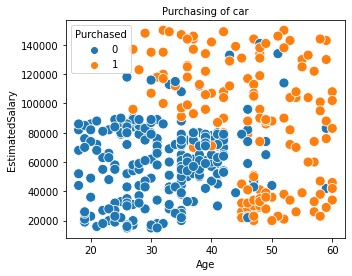

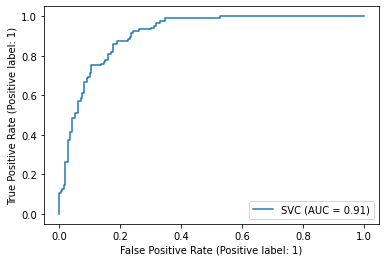

In [28]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
plt.figure(figsize=(5,4))
sns.scatterplot(x='Age',y='EstimatedSalary', hue='Purchased', data=df, s=100)
plt.title('Purchasing of car', y=1, fontsize=10)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
ax= plot_roc_curve(sv, X_train,y_train)

**Visualising the Test set results**

In [ ]:
plot_roc_curve(sv, y_test, X_test)